In [1]:
import pandas
import numpy

In [2]:
def calculate_total_point_sources(slitHeight: int, numOfSlits: int, pointSourcesPerSlit) -> int:
    """Given slit height in nm, number of slits, and the number of point sources per slit,
    calculate the number of total point sources"""
    return (((slitHeight-1)*(numOfSlits)) * pointSourcesPerSlit)

In [3]:
df = pandas.read_csv('gpu-memory-test-realistic-params.csv')
df = df.sort_values('sourcePoints')

# add other time formats
df=df.assign(**{"total-time (minutes)": df['total-time (ms)']/1000/60})
df=df.assign(**{"total-time (hours)": df['total-time (minutes)']/60})

# calculate how many individual point sources there are
df=df.assign(**{"n (# of total point sources)": 

    calculate_total_point_sources(
        slitHeight=df['slit-height'],
        numOfSlits=df['num-of-slits'],
        pointSourcesPerSlit=df['sourcePoints']),
})


df

,sourcePoints,total-time (ms),mem-to-gpu-time (ms),kernel-time (ms),slit-height,num-of-slits,obs-points,bytes-ram-used-at-end,bytes-transferred-total-gpu-to-cpu (DtoH),bytes-transferred-total-cpu-to-to-gpu (HtoD),total-time (minutes),total-time (hours),n (# of total point sources)
0,100,5.118150e+05,21.057024,5.117822e+05,50,200,150,599099322,14955971.9,52340571.9,8.530249,0.142171,980000
3,200,2.107736e+06,37.114113,2.107681e+06,50,200,150,1121923546,29909971.9,104679771.9,35.128937,0.585482,1960000
4,300,4.755410e+06,44.743614,4.755342e+06,50,200,150,1643727763,44862371.9,157012971.9,79.256842,1.320947,2940000
5,400,8.443655e+06,54.972286,8.443570e+06,50,200,150,2162176060,59817371.9,209354971.9,140.727583,2.345460,3920000
6,600,1.896687e+07,81.915810,1.896674e+07,50,200,150,3223384681,89723371.9,314026971.9,316.114567,5.268576,5880000
7,800,3.447343e+07,105.594337,3.447326e+07,50,200,150,4260961545,119630371.9,418700971.9,574.557200,9.575953,7840000
1,1200,7.736986e+07,153.776611,7.736961e+07,50,200,150,6360155442,179446371.9,628056971.9,1289.497600,21.491627,11760000
2,1600,1.338313e+08,195.621017,1.338310e+08,50,200,150,8429974171,239260371.9,837406971.9,2230.522000,37.175367,15680000


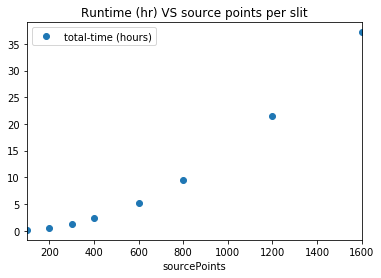

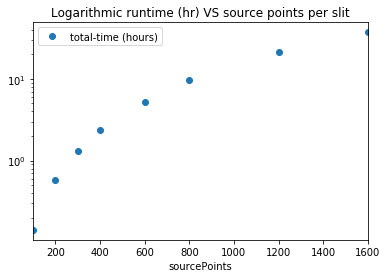

In [12]:
df.plot(x='sourcePoints', y='total-time (hours)', style='o',title='Runtime (hr) VS source points per slit')

df.plot(x='sourcePoints', y='total-time (hours)', style='o',title='Logarithmic runtime (hr) VS source points per slit',logy=True)